In [1]:

from src.analysis.aggregate_trial_results import aggregate_trial_results
from src.analysis.data_processing import (
    validate_experiment_data,
    prune_high_unanswered,
    repeated_measures_rebalance,
)
from src.analysis.model_filters import filter_by_model_family
from src.analysis.df_formatting import (
    prepare_for_repeated_measures,
)
from src.analysis.repeated_measures_anova import (
    run_repeated_measures_anova,
    print_rm_anova_summary,
    prepare_repeated_measures_anova_exp2
)

# Create summary stats using default results folder path
aggregate_trial_results = aggregate_trial_results()

# Prepare data for analysis
repeated_df_31 = prepare_repeated_measures_anova_exp2(aggregate_trial_results, 'llama_31')

# Run the repeated measures ANOVA
anova_results_31 = run_repeated_measures_anova(repeated_df_31)

Aggregated trial results saved to /workspaces/coordination/pipeline/4_analysis/trial_results_aggregated.csv
Data validation warning: 1 issue(s) found
Data preparation: removed 1 rows (unanswered) and 5 rows (balance)


In [2]:
#overview
print_rm_anova_summary(anova_results_31)


=== Repeated Measures ANOVA Summary ===

TOP_PROP:

Descriptive Statistics:
+---------------------+---------+--------+-------+
|                     |   count |   mean |   std |
+=====================+=========+========+=======+
| ('405B', 'with')    |      20 |  0.623 | 0.189 |
+---------------------+---------+--------+-------+
| ('405B', 'without') |      20 |  0.582 | 0.165 |
+---------------------+---------+--------+-------+
| ('70B', 'with')     |      20 |  0.528 | 0.134 |
+---------------------+---------+--------+-------+
| ('70B', 'without')  |      20 |  0.529 | 0.131 |
+---------------------+---------+--------+-------+
| ('8B', 'with')      |      20 |  0.36  | 0.052 |
+---------------------+---------+--------+-------+
| ('8B', 'without')   |      20 |  0.438 | 0.122 |
+---------------------+---------+--------+-------+

Model Size Effect:
F(2,38) = 16.52, p = 6.88e-06, η² = 0.278
→ strong evidence was found for a large effect of model size

Reasoning Effect:
F(1,19) = 0.68, 

In [3]:
# # Prepare data for analysis
repeated_df_32 = prepare_repeated_measures_anova_exp2(aggregate_trial_results, 'llama_32')



Data validation warning: 1 issue(s) found
Data preparation: removed 11 rows (unanswered) and 29 rows (balance)


In [4]:
# Run the repeated measures ANOVA
anova_results_32 = run_repeated_measures_anova(repeated_df_32)
print_rm_anova_summary(anova_results_32)


=== Repeated Measures ANOVA Summary ===

TOP_PROP:

Descriptive Statistics:
+-------------------+---------+--------+-------+
|                   |   count |   mean |   std |
+===================+=========+========+=======+
| ('1B', 'with')    |      11 |  0.312 | 0.052 |
+-------------------+---------+--------+-------+
| ('1B', 'without') |      11 |  0.41  | 0.07  |
+-------------------+---------+--------+-------+
| ('3B', 'with')    |      11 |  0.398 | 0.072 |
+-------------------+---------+--------+-------+
| ('3B', 'without') |      11 |  0.415 | 0.085 |
+-------------------+---------+--------+-------+

Model Size Effect:
F(1,10) = 2.84, p = 1.23e-01, η² = 0.104
→ no evidence was found for a medium effect of model size

Reasoning Effect:
F(1,10) = 11.95, p = 0.006, η² = 0.153
→ evidence was found for an effect of reasoning condition

Interaction Effect:
F(1,10) = 5.84, p = 0.036, η² = 0.083
→ some evidence was found for an interaction between model size and reasoning

CONVERGENCE

/workspaces/coordination/src/analysis/visualization.py:300: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 2
  fig.legend(handles=legend_handles,
/workspaces/coordination/src/analysis/visualization.py:300: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 2
  fig.legend(handles=legend_handles,


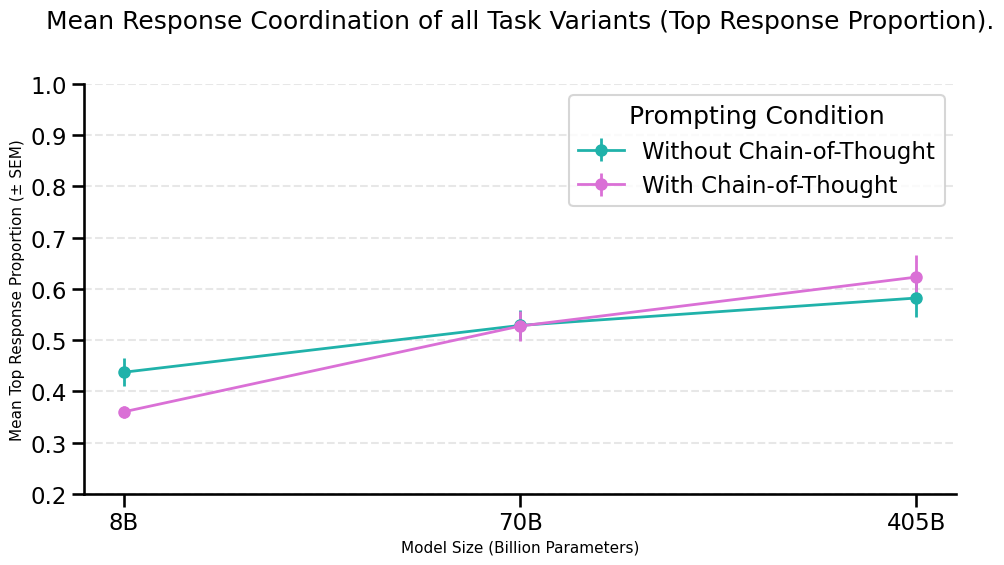

<Figure size 640x480 with 0 Axes>

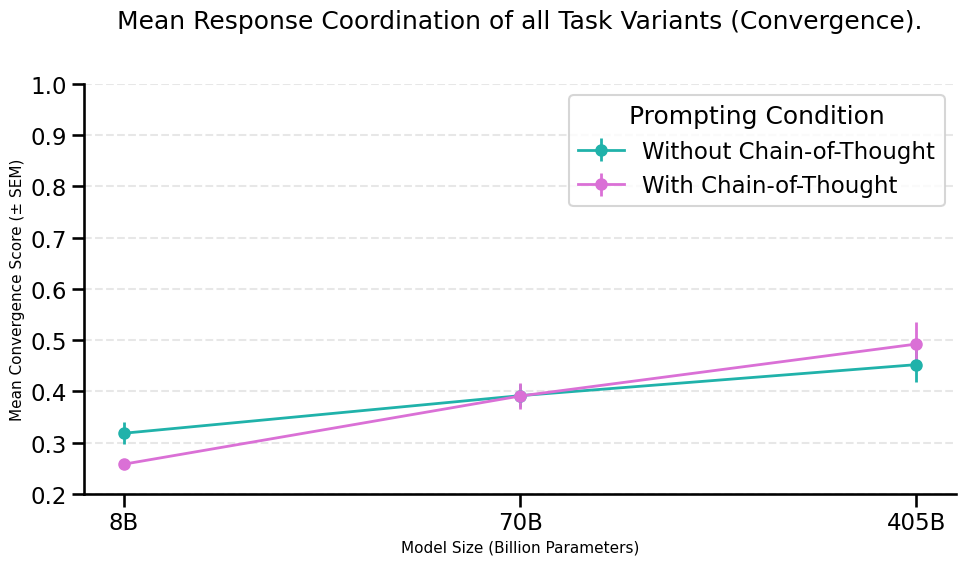

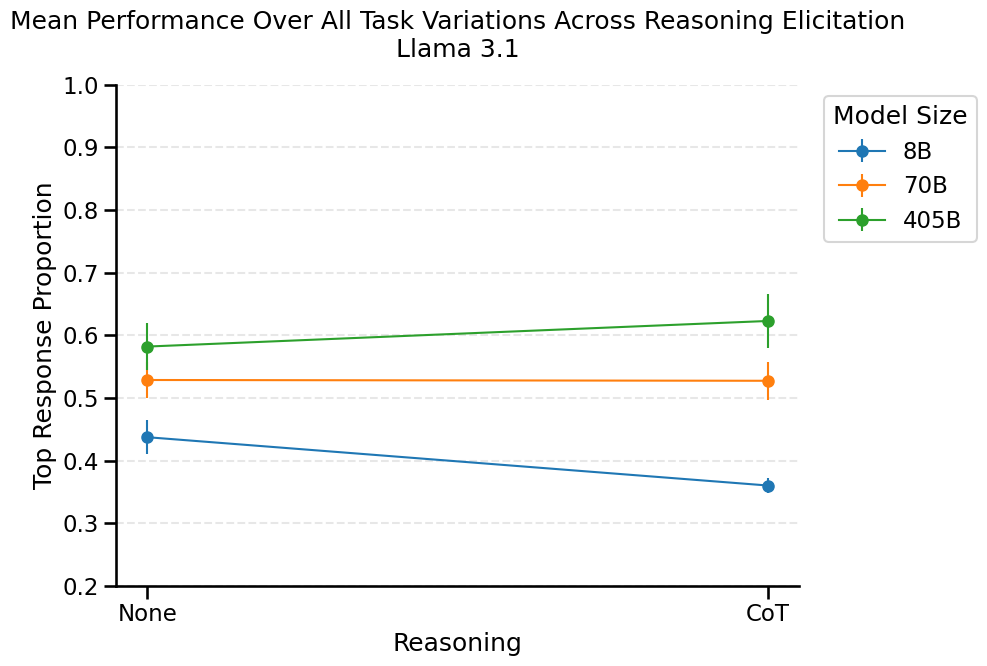

<Figure size 640x480 with 0 Axes>

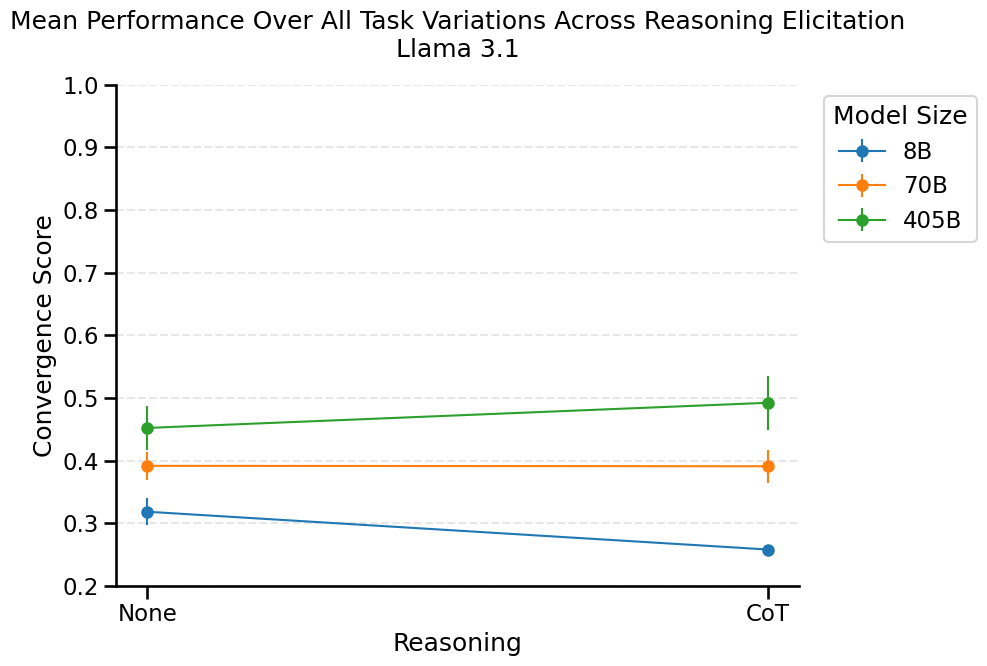

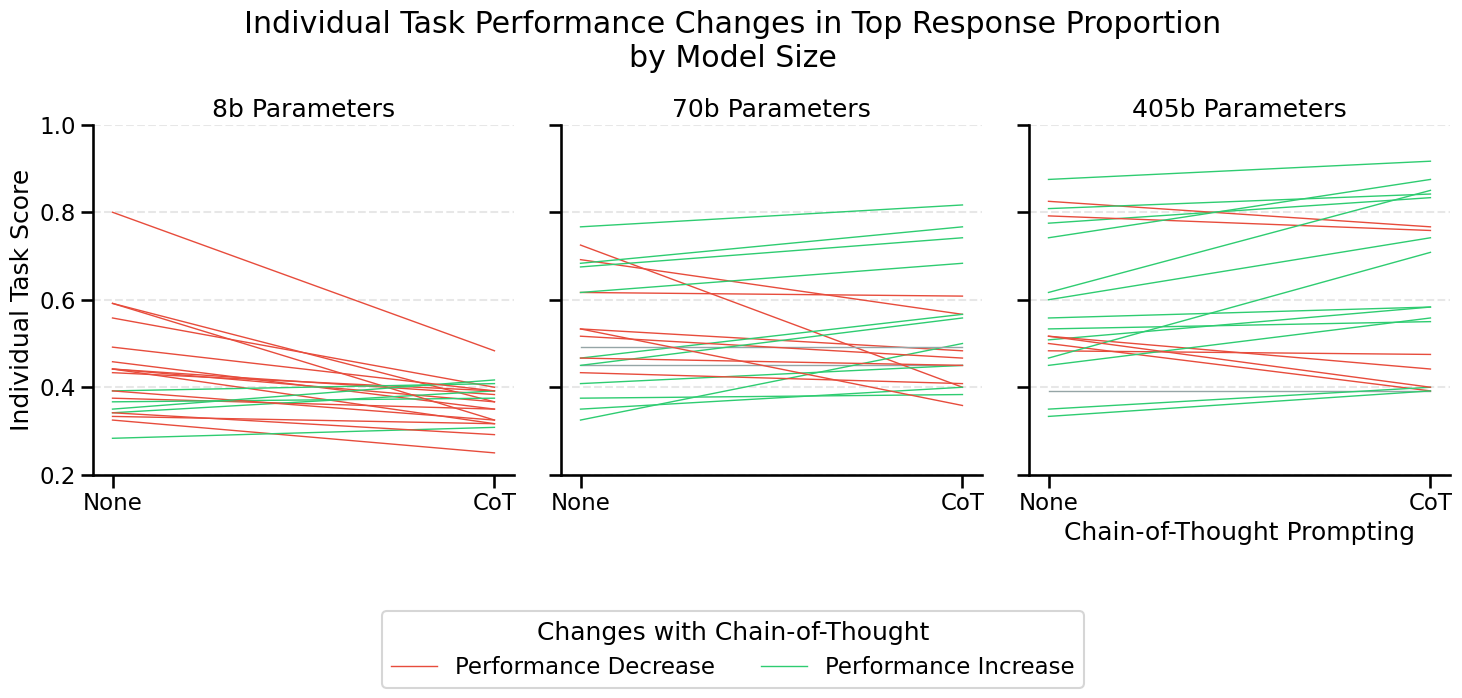

<Figure size 640x480 with 0 Axes>

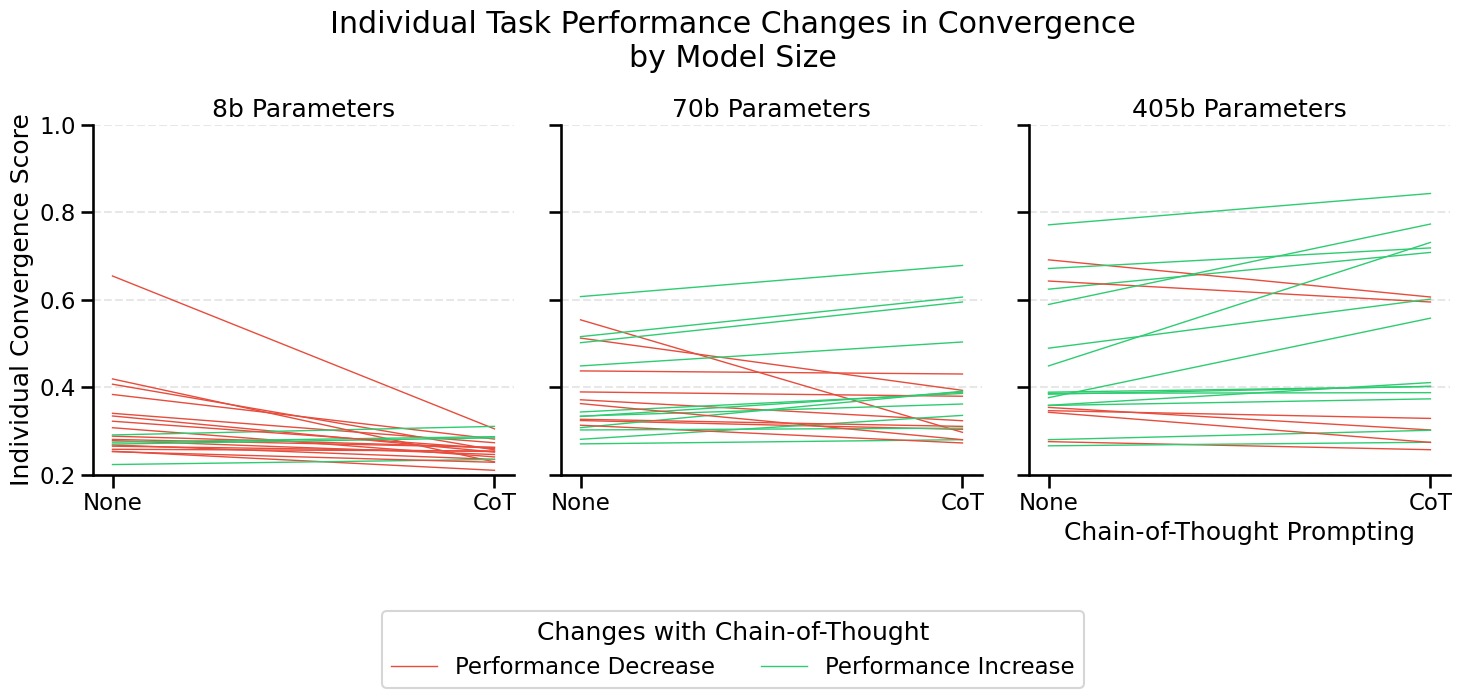

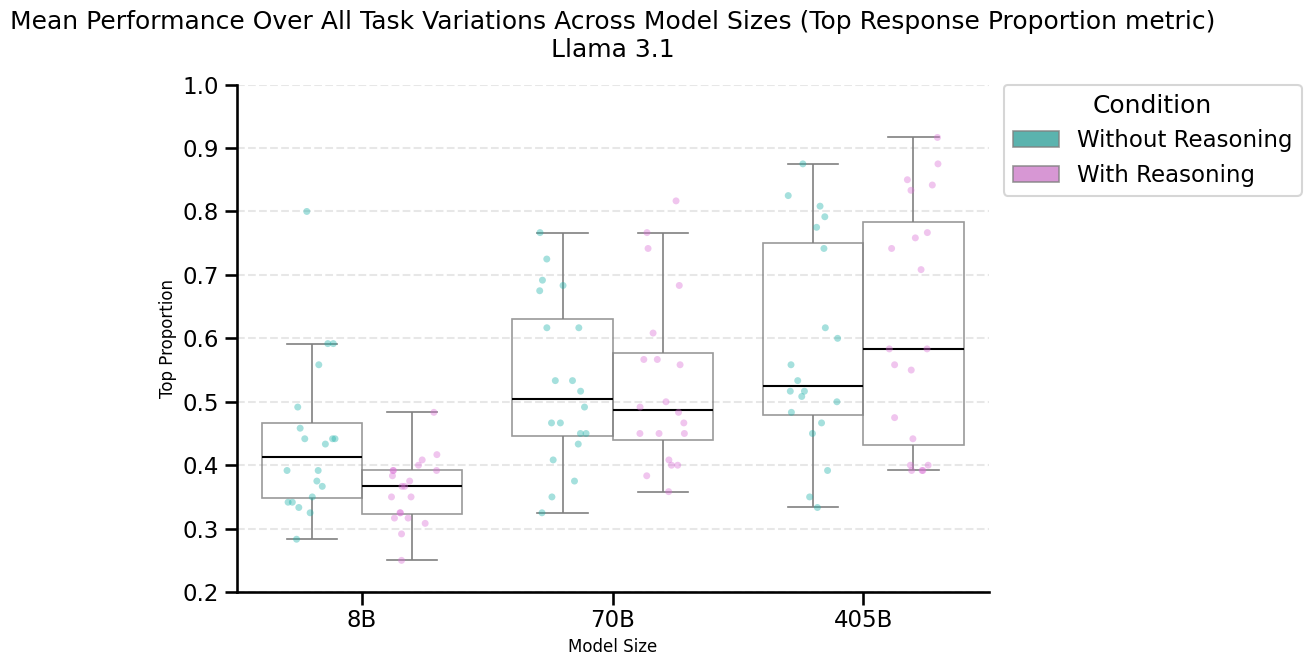

<Figure size 640x480 with 0 Axes>

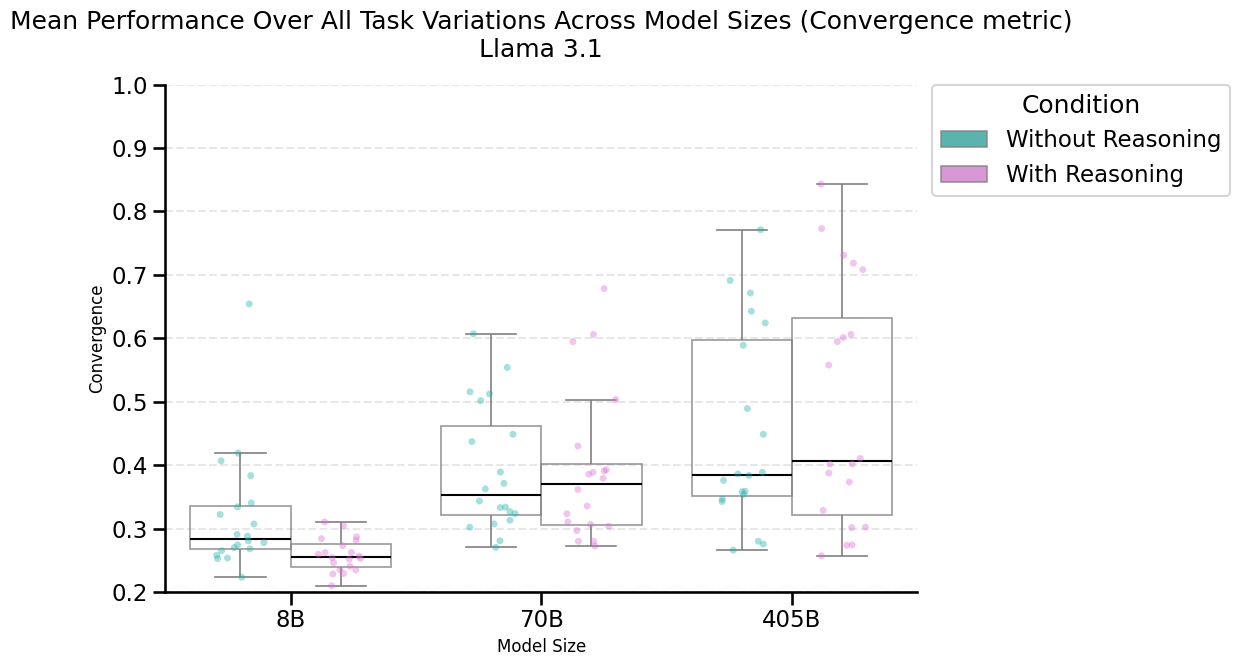

In [5]:
from src.analysis.visualization import (
    plot_model_comparison,
    create_comprehensive_analysis
)
create_comprehensive_analysis(repeated_df_31)
plot_model_comparison(repeated_df_31)
